In [29]:
import pandas as pd

In [30]:
# reading the raw data back
path = "tokyo_data_10.csv"
data = pd.read_csv(path, index_col=False, sep=",")

In [45]:
data.describe(include='all')

,post_id,post_title,price,neighborhood,condition,image_id,uri
count,2017.000000,2017,2017.000000,2017,2017,2017.000000,2017
unique,NaN,383,NaN,135,6,NaN,2017
top,NaN,Top collection (lady),NaN,Tokyo Roppongi,unknown,NaN,images/58_00W0W_7eV4pLua8YB_5.jpg
freq,NaN,69,NaN,254,475,NaN,1
mean,192.125434,NaN,8025.659891,NaN,NaN,3.969757,NaN
std,116.482404,NaN,17873.016363,NaN,NaN,4.602404,NaN
min,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,84.000000,NaN,1000.000000,NaN,NaN,1.000000,NaN
50%,186.000000,NaN,3000.000000,NaN,NaN,2.000000,NaN
75%,290.000000,NaN,8000.000000,NaN,NaN,5.000000,NaN


In [32]:
# we list all the clothing and accesories categories we are interested in
target_list = ["glass", "cap", "hat", "shoe", "sneaker", "heel", "boot", "jacket", "short", "jean", "trouser", "skirt", "shirt", "tshirt", "top", "coat", "suit", "dress", "wallet", "watch", "suitcas", "bag", "backpack"]

In [33]:
# we import a stemmer from nltk and initialize it
# as in text we are going to get plural nouns on top
# of the singular ones we decided to use a stemmer to 
# solve that problem, for more information: 
# http://www.nltk.org/howto/stem.html
from nltk.stem.porter import *
import re
stemmer = PorterStemmer()

In [34]:
# the stemmer helps but we will need to fix some of the
# stemmed words back and we will use this dictionary
# to do it
un_stemmer = {"glass": "glasses", 
              "shoe": "shoes", 
              "sneaker": "sneakers", 
              "boot": "boots", 
              "heel": "heels", 
              "short": "shorts",
              "jean": "jeans",
              "trouser": "trousers",
              "suitcas": "suitcase"}

In [35]:
# this method help us process the text in the post titles
# and look for matches using the target list of categories
# we already created
def category_searcher(input_string, target_list):
    input_string = input_string.lower()
    input_split = input_string.split(" ")
    found = []
    for element in input_split:
        element = re.sub("[^a-zA-Z]+", "", element)
        stem_element = stemmer.stem(element)
        if stem_element in target_list:
            found.append(stem_element)
            print(element, stem_element, 'match')
        else:
            print(element, stem_element, 'NOT a match')
    
    if not found:
        found = ["other"]
    return found[0]

In [37]:
# we are going to loop over the titles we scraped from craigslist 
# and use the category_searcher method to help us assign them
# one of the categories we are interested in or "other"
results = []
for element in data["post_title"]:
    found = category_searcher(element, target_list)
    results.append([element, found])

stitchon stitchon NOT a match
bag bag match
for for NOT a match
sale sale NOT a match
brand brand NOT a match
new new NOT a match
office offic NOT a match
worker worker NOT a match
students student NOT a match
ok ok NOT a match
stitchon stitchon NOT a match
bag bag match
for for NOT a match
sale sale NOT a match
brand brand NOT a match
new new NOT a match
office offic NOT a match
worker worker NOT a match
students student NOT a match
ok ok NOT a match
stitchon stitchon NOT a match
bag bag match
for for NOT a match
sale sale NOT a match
brand brand NOT a match
new new NOT a match
office offic NOT a match
worker worker NOT a match
students student NOT a match
ok ok NOT a match
seiko seiko NOT a match
automatic automat NOT a match
watch watch match
  NOT a match
sapphire sapphir NOT a match
glass glass match
seiko seiko NOT a match
automatic automat NOT a match
watch watch match
  NOT a match
sapphire sapphir NOT a match
glass glass match
seiko seiko NOT a match
automatic automat NOT a ma

backpack backpack match
and and NOT a match
cd cd NOT a match
player player NOT a match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
gucci gucci NOT a match
men men NOT a match
wallet wallet match
monclear monclear NOT a match
winter winter NOT a match
jacket jacket match
monclear monclear NOT a match
winter winter NOT a match
jacket jacket match
monclear monclear NOT a match
winter winter NOT a match
jacket jacket match
monclear monclear NOT a match
winter winter NOT a match
jacket jacket match
monclear monclear NOT a match
wi

cosplay cosplay NOT a match
navy navi NOT a match
school school NOT a match
uniform uniform NOT a match
cosplay cosplay NOT a match
navy navi NOT a match
school school NOT a match
uniform uniform NOT a match
cosplay cosplay NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piece piec NOT a match
collection collect NOT a match
one one NOT a match
piec

mens men NOT a match
shirts shirt match
  NOT a match
inch inch NOT a match
collar collar NOT a match
high high NOT a match
end end NOT a match
x x NOT a match
mens men NOT a match
shirts shirt match
  NOT a match
inch inch NOT a match
collar collar NOT a match
high high NOT a match
end end NOT a match
x x NOT a match
mens men NOT a match
shirts shirt match
  NOT a match
inch inch NOT a match
collar collar NOT a match
high high NOT a match
end end NOT a match
x x NOT a match
mens men NOT a match
shirts shirt match
  NOT a match
inch inch NOT a match
collar collar NOT a match
high high NOT a match
end end NOT a match
x x NOT a match
mens men NOT a match
shirts shirt match
  NOT a match
inch inch NOT a match
collar collar NOT a match
high high NOT a match
end end NOT a match
x x NOT a match
mens men NOT a match
shirts shirt match
  NOT a match
inch inch NOT a match
collar collar NOT a match
high high NOT a match
end end NOT a match
x x NOT a match
mens men NOT a match
shirts shirt match


eddie eddi NOT a match
bauer bauer NOT a match
winter winter NOT a match
coat coat match
woman woman NOT a match
size size NOT a match
small small NOT a match
eddie eddi NOT a match
bauer bauer NOT a match
winter winter NOT a match
coat coat match
woman woman NOT a match
size size NOT a match
small small NOT a match
navy navi NOT a match
wool wool NOT a match
pea pea NOT a match
coat coat match
mens men NOT a match
usa usa NOT a match
m m NOT a match
navy navi NOT a match
wool wool NOT a match
pea pea NOT a match
coat coat match
mens men NOT a match
usa usa NOT a match
m m NOT a match
navy navi NOT a match
wool wool NOT a match
pea pea NOT a match
coat coat match
mens men NOT a match
usa usa NOT a match
m m NOT a match
navy navi NOT a match
wool wool NOT a match
pea pea NOT a match
coat coat match
mens men NOT a match
usa usa NOT a match
m m NOT a match
ralph ralph NOT a match
lauren lauren NOT a match
jacket jacket match
ralph ralph NOT a match
lauren lauren NOT a match
jacket jacket 

  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
  NOT a match
selling sell NOT a match
clothes cloth NOT a match
moving move NOT a match
away away NOT a match
 

duffel duffel NOT a match
saddleback saddleback NOT a match
leather leather NOT a match
large larg NOT a match
waterbag waterbag NOT a match
duffel duffel NOT a match
saddleback saddleback NOT a match
leather leather NOT a match
large larg NOT a match
waterbag waterbag NOT a match
duffel duffel NOT a match
saddleback saddleback NOT a match
leather leather NOT a match
large larg NOT a match
waterbag waterbag NOT a match
duffel duffel NOT a match
  NOT a match
casio casio NOT a match
watches watch match
for for NOT a match
sale sale NOT a match
  NOT a match
casio casio NOT a match
watches watch match
for for NOT a match
sale sale NOT a match
  NOT a match
casio casio NOT a match
watches watch match
for for NOT a match
sale sale NOT a match
  NOT a match
casio casio NOT a match
watches watch match
for for NOT a match
sale sale NOT a match
  NOT a match
casio casio NOT a match
watches watch match
for for NOT a match
sale sale NOT a match
karrimor karrimor NOT a match
spike spike NOT a mat

hugo hugo NOT a match
boss boss NOT a match
  NOT a match
vest vest NOT a match
size size NOT a match
eu eu NOT a match
usr usr NOT a match
hugo hugo NOT a match
boss boss NOT a match
  NOT a match
vest vest NOT a match
size size NOT a match
eu eu NOT a match
usr usr NOT a match
hugo hugo NOT a match
boss boss NOT a match
  NOT a match
vest vest NOT a match
size size NOT a match
eu eu NOT a match
usr usr NOT a match
hugo hugo NOT a match
boss boss NOT a match
  NOT a match
vest vest NOT a match
size size NOT a match
eu eu NOT a match
usr usr NOT a match
hugo hugo NOT a match
boss boss NOT a match
  NOT a match
vest vest NOT a match
size size NOT a match
eu eu NOT a match
usr usr NOT a match
hugo hugo NOT a match
boss boss NOT a match
  NOT a match
vest vest NOT a match
size size NOT a match
eu eu NOT a match
usr usr NOT a match
knit knit NOT a match
hat hat match
knit knit NOT a match
hat hat match
dainese daines NOT a match
mesh mesh NOT a match
riding ride NOT a match
jacket jacket m

laundry laundri NOT a match
shop shop NOT a match
high high NOT a match
quality qualiti NOT a match
dressing dress match
shirt shirt match
cleaned clean NOT a match
by by NOT a match
laundry laundri NOT a match
shop shop NOT a match
selling sell NOT a match
clothes cloth NOT a match
never never NOT a match
or or NOT a match
barely bare NOT a match
used use NOT a match
selling sell NOT a match
clothes cloth NOT a match
never never NOT a match
or or NOT a match
barely bare NOT a match
used use NOT a match
selling sell NOT a match
clothes cloth NOT a match
never never NOT a match
or or NOT a match
barely bare NOT a match
used use NOT a match
selling sell NOT a match
clothes cloth NOT a match
never never NOT a match
or or NOT a match
barely bare NOT a match
used use NOT a match
selling sell NOT a match
clothes cloth NOT a match
never never NOT a match
or or NOT a match
barely bare NOT a match
used use NOT a match
selling sell NOT a match
clothes cloth NOT a match
never never NOT a match
or

and and NOT a match
top top match
roppongi roppongi NOT a match
tokyo tokyo NOT a match
halloween halloween NOT a match
ballet ballet NOT a match
and and NOT a match
dressup dressup NOT a match
pink pink NOT a match
feather feather NOT a match
stole stole NOT a match
girlladies girlladi NOT a match
halloween halloween NOT a match
costume costum NOT a match
girlladies girlladi NOT a match
halloween halloween NOT a match
costume costum NOT a match
porsche porsch NOT a match
design design NOT a match
mens men NOT a match
shoes shoe match
size size NOT a match
eu eu NOT a match
  NOT a match
porsche porsch NOT a match
design design NOT a match
mens men NOT a match
shoes shoe match
size size NOT a match
eu eu NOT a match
  NOT a match
porsche porsch NOT a match
design design NOT a match
mens men NOT a match
shoes shoe match
size size NOT a match
eu eu NOT a match
  NOT a match
porsche porsch NOT a match
design design NOT a match
mens men NOT a match
shoes shoe match
size size NOT a match
eu

added ad NOT a match
halloween halloween NOT a match
dressup dressup NOT a match
  NOT a match
costumes costum NOT a match
mostly mostli NOT a match
for for NOT a match
kids kid NOT a match
more more NOT a match
stuff stuff NOT a match
added ad NOT a match
halloween halloween NOT a match
dressup dressup NOT a match
  NOT a match
costumes costum NOT a match
mostly mostli NOT a match
for for NOT a match
kids kid NOT a match
more more NOT a match
stuff stuff NOT a match
added ad NOT a match
halloween halloween NOT a match
dressup dressup NOT a match
  NOT a match
costumes costum NOT a match
mostly mostli NOT a match
for for NOT a match
kids kid NOT a match
more more NOT a match
stuff stuff NOT a match
added ad NOT a match
halloween halloween NOT a match
dressup dressup NOT a match
  NOT a match
costumes costum NOT a match
mostly mostli NOT a match
for for NOT a match
kids kid NOT a match
more more NOT a match
stuff stuff NOT a match
added ad NOT a match
halloween halloween NOT a match
dre

jersey jersey NOT a match
karl karl NOT a match
anthony anthoni NOT a match
towns town NOT a match
timberwolves timberwolv NOT a match
swingman swingman NOT a match
jersey jersey NOT a match
karl karl NOT a match
anthony anthoni NOT a match
towns town NOT a match
timberwolves timberwolv NOT a match
swingman swingman NOT a match
jersey jersey NOT a match
karl karl NOT a match
anthony anthoni NOT a match
towns town NOT a match
timberwolves timberwolv NOT a match
swingman swingman NOT a match
jersey jersey NOT a match
damian damian NOT a match
lillard lillard NOT a match
portland portland NOT a match
swingman swingman NOT a match
jersey jersey NOT a match
damian damian NOT a match
lillard lillard NOT a match
portland portland NOT a match
swingman swingman NOT a match
jersey jersey NOT a match
damian damian NOT a match
lillard lillard NOT a match
portland portland NOT a match
swingman swingman NOT a match
jersey jersey NOT a match
damian damian NOT a match
lillard lillard NOT a match
portl

ralph ralph NOT a match
lauren lauren NOT a match
genuine genuin NOT a match
mens men NOT a match
jeans jean match
slim slim NOT a match
jeans jean match
polo polo NOT a match
ralph ralph NOT a match
lauren lauren NOT a match
polo polo NOT a match
ralph ralph NOT a match
lauren lauren NOT a match
genuine genuin NOT a match
mens men NOT a match
jeans jean match
slim slim NOT a match
jeans jean match
emporio emporio NOT a match
armani armani NOT a match
  NOT a match
short short match
  NOT a match
emporio emporio NOT a match
armani armani NOT a match
  NOT a match
short short match
  NOT a match
emporio emporio NOT a match
armani armani NOT a match
  NOT a match
short short match
  NOT a match
emporio emporio NOT a match
armani armani NOT a match
  NOT a match
short short match
  NOT a match
emporio emporio NOT a match
armani armani NOT a match
  NOT a match
short short match
  NOT a match
emporio emporio NOT a match
armani armani NOT a match
  NOT a match
short short match
  NOT a matc

eu eu NOT a match
  NOT a match
timberland timberland NOT a match
premium premium NOT a match
waterproof waterproof NOT a match
boots boot match
size size NOT a match
eu eu NOT a match
  NOT a match
timberland timberland NOT a match
premium premium NOT a match
waterproof waterproof NOT a match
boots boot match
size size NOT a match
eu eu NOT a match
  NOT a match
timberland timberland NOT a match
premium premium NOT a match
waterproof waterproof NOT a match
boots boot match
size size NOT a match
eu eu NOT a match
  NOT a match
polo polo NOT a match
ralph ralph NOT a match
lauren lauren NOT a match
shoes shoe match
size size NOT a match
eu eu NOT a match
  NOT a match
polo polo NOT a match
ralph ralph NOT a match
lauren lauren NOT a match
shoes shoe match
size size NOT a match
eu eu NOT a match
  NOT a match
polo polo NOT a match
ralph ralph NOT a match
lauren lauren NOT a match
shoes shoe match
size size NOT a match
eu eu NOT a match
  NOT a match
polo polo NOT a match
ralph ralph NOT 

loafers loafer NOT a match
brand brand NOT a match
new new NOT a match
dr dr NOT a match
martens marten NOT a match
barrett barrett NOT a match
navy navi NOT a match
loafers loafer NOT a match
brand brand NOT a match
new new NOT a match
dr dr NOT a match
martens marten NOT a match
barrett barrett NOT a match
navy navi NOT a match
loafers loafer NOT a match
unused unus NOT a match
bought bought NOT a match
brandnew brandnew NOT a match
hugoboss hugoboss NOT a match
uk uk NOT a match
us us NOT a match
mens men NOT a match
shoes shoe match
leather leather NOT a match
black black NOT a match
unused unus NOT a match
bought bought NOT a match
brandnew brandnew NOT a match
hugoboss hugoboss NOT a match
uk uk NOT a match
us us NOT a match
mens men NOT a match
shoes shoe match
leather leather NOT a match
black black NOT a match
unused unus NOT a match
bought bought NOT a match
brandnew brandnew NOT a match
hugoboss hugoboss NOT a match
uk uk NOT a match
us us NOT a match
mens men NOT a match
sh

mod mod NOT a match
scarf scarf NOT a match
black black NOT a match
polka polka NOT a match
dot dot NOT a match
mod mod NOT a match
scarf scarf NOT a match
black black NOT a match
polka polka NOT a match
dot dot NOT a match
mod mod NOT a match
scarf scarf NOT a match
ramones ramon NOT a match
tshirt tshirt match
ramones ramon NOT a match
tshirt tshirt match
ramones ramon NOT a match
tshirt tshirt match
timberland timberland NOT a match
  NOT a match
zip zip NOT a match
sweatshirt sweatshirt NOT a match
timberland timberland NOT a match
  NOT a match
zip zip NOT a match
sweatshirt sweatshirt NOT a match
alexander alexand NOT a match
mcqueen mcqueen NOT a match
mens men NOT a match
coat coat match
alexander alexand NOT a match
mcqueen mcqueen NOT a match
mens men NOT a match
coat coat match
alexander alexand NOT a match
mcqueen mcqueen NOT a match
mens men NOT a match
coat coat match
alexander alexand NOT a match
mcqueen mcqueen NOT a match
mens men NOT a match
coat coat match
hermes her

kea kea NOT a match
mauna mauna NOT a match
kea kea NOT a match
  NOT a match
protectors protector NOT a match
of of NOT a match
sacred sacr NOT a match
mauna mauna NOT a match
kea kea NOT a match
mauna mauna NOT a match
kea kea NOT a match
  NOT a match
protectors protector NOT a match
of of NOT a match
sacred sacr NOT a match
mauna mauna NOT a match
kea kea NOT a match
mauna mauna NOT a match
kea kea NOT a match
  NOT a match
protectors protector NOT a match
of of NOT a match
sacred sacr NOT a match
mauna mauna NOT a match
kea kea NOT a match
mauna mauna NOT a match
kea kea NOT a match
  NOT a match
protectors protector NOT a match
of of NOT a match
sacred sacr NOT a match
mauna mauna NOT a match
kea kea NOT a match
mauna mauna NOT a match
kea kea NOT a match
  NOT a match
protectors protector NOT a match
of of NOT a match
sacred sacr NOT a match
mauna mauna NOT a match
kea kea NOT a match


In [38]:
results

[['Stitch-On Bag for sale! Brand New, Office worker, students OK', 'bag'],
 ['Stitch-On Bag for sale! Brand New, Office worker, students OK', 'bag'],
 ['Stitch-On Bag for sale! Brand New, Office worker, students OK', 'bag'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Seiko automatic watch - sapphire glass', 'watch'],
 ['Famous brand Warm women knit', 'other'],
 ['Jean & pant collection (lady)', 'jean'],
 ['Jean & pant collection (lady)', 'jean'],
 ['Jean & pant collection (lady)', 'jean'],
 ['Jean & pant collection (lady)', 'jean'],
 ['Jean & pant 

In [39]:
# next step will be transforming our results list into
# an auxiliar dataframe
results = pd.DataFrame(results)
results[1].describe(include='all')

count      2017
unique       23
top       other
freq        677
Name: 1, dtype: object

In [40]:
# we fix the category names using the un_stemmer dictionary
results[1] = results[1].map(un_stemmer).fillna(results[1])
results[1].describe(include='all')

count      2017
unique       23
top       other
freq        677
Name: 1, dtype: object

In [41]:
# we are going to rename the columns in our auxiliar dataframe
results.columns = ['text', 'categories']

In [42]:
# we can plot the value_count per category to help visualize what
# kind of data we were able to scrap
fig1 = results['categories'].value_counts().plot(kind='pie', figsize=(16,8)).get_figure()
fig1.savefig("pie_plot_images.png")

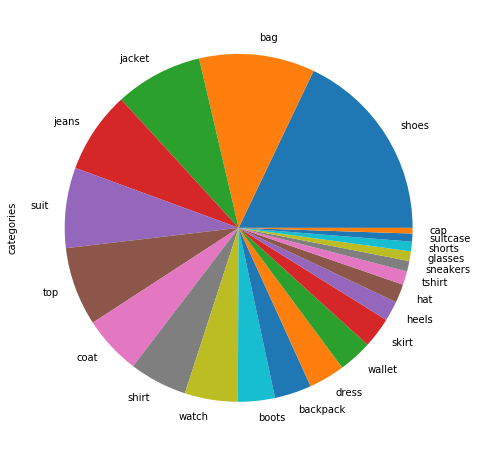

In [43]:
# and also we'll to see a pie chart just for the categories we are interested in
not_other = results['categories']!="other"
results_not_other = results[not_other]
fig2 = results_not_other['categories'].value_counts().plot(kind='pie', figsize=(16,8)).get_figure()
fig2.savefig("pie_plot_images_no_other.png")

In [48]:
# now we are going to add the newly acquired information to a new column 
# to our main dataframe and, lastly, we will save the results into a new csv file
data["category"] = results['categories']
data.describe(include='all')
final_csv_name = "clothing_fashion_tokyo_dataset.csv"
data.to_csv(final_csv_name, index= False)